### Vision Transformer

### Importing Libraries

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

### Images to Patches

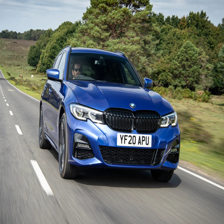

In [17]:
# Uploading and Resizing the Image to Resolution (224) as mentioned in the Paper
image=Image.open('img.jpg').resize((224,224))
image

array([[[188, 199, 208],
        [179, 192, 204],
        [175, 189, 202],
        ...,
        [162, 179, 195],
        [162, 181, 195],
        [159, 177, 192]],

       [[182, 193, 204],
        [178, 192, 204],
        [175, 189, 202],
        ...,
        [159, 177, 192],
        [160, 178, 192],
        [157, 175, 189]],

       [[178, 191, 205],
        [177, 192, 206],
        [174, 189, 203],
        ...,
        [158, 176, 191],
        [158, 176, 191],
        [157, 175, 189]],

       ...,

       [[111, 109, 110],
        [105, 105, 104],
        [104, 106, 106],
        ...,
        [121, 120, 115],
        [121, 120, 116],
        [120, 119, 115]],

       [[111, 110, 108],
        [102, 104, 102],
        [102, 105, 106],
        ...,
        [121, 120, 116],
        [120, 119, 115],
        [120, 119, 115]],

       [[112, 111, 108],
        [103, 103, 102],
        [102, 104, 107],
        ...,
        [125, 124, 120],
        [122, 121, 117],
        [119, 118, 114]]], dtype=uint8)
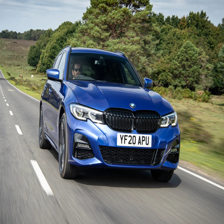

In [18]:
# Converting the Image to Numbers
x=np.array(image)
x

In [26]:
# Converting to Flattened 2D Patches
# Given Patch Size is (16), so to get 16 patch size 224/16 we get 14 patches, and a total of 14*14=196 patches
# Formula Given in the Paper : N=(H/P*W/P),x_p=(P*P*C),N*x_p

P=16
C=3
patches=x.reshape(x.shape[0]//P,P,x.shape[1]//P,P,C).swapaxes(1,2).reshape(-1,P*P*C)
x_p=np.reshape(patches,(-1,P*P*C))
N=x_p.shape[0]
print(x_p.shape)

(196, 768)
